In [1]:
import xlrd
import xlsxwriter
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.vector_ar.var_model import VAR
import matplotlib.pyplot as pyplot

wb = xlrd.open_workbook(filename='MCM_NFLIS_Data.xlsx')
sheet = wb.sheet_by_name('Data')

Datas = []
ncols = sheet.ncols
nrows = sheet.nrows

State_code = {}
County_code = {}
for i in range(1,nrows):
    data = sheet.row_values(i)
    
    if data[3] not in State_code:
        State_code[data[3]] = data[1]
        
    if data[4] not in State_code:
        County_code[data[4]] = data[2]
    for j in range(4):
        data.pop(1)
    data[0] = int(data[0])
    data[1] = int(data[1])
    Datas.append(data)
    
county = []
opioid = []
for i in Datas:
    if i[1] not in county:
        county.append(i[1])

county.sort()

for i in Datas:
    if i[2] not in opioid:
        opioid.append(i[2])
        
        
        
        
Opioid_country = {}

for i in Datas:
    if i[0] not in Opioid_country:
        opioid_country = {}
        if i[1] not in opioid_country:
            opioid_country[i[1]] = []
            opioid_country[i[1]].append({'Total':i[4]})
            new_opioid = {}
            new_opioid[i[2]] = i[3]
            opioid_country[i[1]].append(new_opioid)
        
        else:
            new_opioid = {}
            new_opioid[i[2]] = i[3]
            opioid_country[i[1]].append(new_opioid)
        
        Opioid_country[i[0]] = opioid_country
        
    else:
        if i[1] not in Opioid_country[i[0]]:
            Opioid_country[i[0]][i[1]] = []
            Opioid_country[i[0]][i[1]].append({'Total':i[4]})
            new_opioid = {}
            new_opioid[i[2]] = i[3]
            Opioid_country[i[0]][i[1]].append(new_opioid)
            
        else:
            new_opioid = {}
            new_opioid[i[2]] = i[3]
            Opioid_country[i[0]][i[1]].append(new_opioid)
            
for i in Opioid_country:
    for j in Opioid_country[i]:
        sum = 0.0
        for k in Opioid_country[i][j]:
            for m in k:
                sum += k[m]
        Opioid_country[i][j].insert(0,{'Total_Reports':sum - Opioid_country[i][j][0]['Total']})
        
        
        


wbk = xlsxwriter.Workbook('Opioid_county.xlsx')
sheet = wbk.add_worksheet('Data')

sheet.write(0, 0, 'YYYY')
sheet.write(0, 1, 'FIPS_Combined')
sheet.write(0, 2, 'SubstanceName')
sheet.write(0, 3, 'DrugReports')
sheet.write(0, 4, 'TrueTotalDrugReports')
sheet.write(0, 5, 'TotalDrugReportsCounty')

count = 1
for i in Opioid_country:
    for j in Opioid_country[i]:
        for k in range(2, len(Opioid_country[i][j])):
            sheet.write(count, 0, i)
            sheet.write(count, 1, j)
            for m in Opioid_country[i][j][k]:
                sheet.write(count, 2, m)
                sheet.write(count, 3, Opioid_country[i][j][k][m])
                sheet.write(count, 4, Opioid_country[i][j][0]['Total_Reports'])
                sheet.write(count, 5, Opioid_country[i][j][1]['Total'])
                count += 1
                
wbk.close()


Opioid_sub = {}

for i in Datas:
    if i[0] not in Opioid_sub:
        opioid_sub = {}
        if i[2] not in opioid_sub:
            opioid_sub[i[2]] = []
            new = {}
            new[i[1]] = i[3]
            opioid_sub[i[2]].append(new)
            
        else:
            new = {}
            new[i[1]] = i[3]
            opioid_sub[i[2]].append(new)
            
        Opioid_sub[i[0]] = opioid_sub
        
    else:
        if i[2] not in Opioid_sub[i[0]]:
            Opioid_sub[i[0]][i[2]] = []
            new_opioid = {}
            new_opioid[i[1]] = i[3]
            Opioid_sub[i[0]][i[2]].append(new_opioid)
            
        else:
            new_opioid = {}
            new_opioid[i[1]] = i[3]
            Opioid_sub[i[0]][i[2]].append(new_opioid)

for i in Opioid_sub:
    for j in Opioid_sub[i]:
        sum = 0.0
        for k in Opioid_sub[i][j]:
            for m in k:
                sum += k[m]
        Opioid_sub[i][j].insert(0,{'Total_Reports':sum})
        Opioid_sub[i][j].insert(0,{'Total_County':len(Opioid_sub[i][j])-1})
        
wbk = xlsxwriter.Workbook('Opioid_sub.xlsx')
sheet = wbk.add_worksheet('Data')

sheet.write(0, 0, 'YYYY')
sheet.write(0, 1, 'SubstanceName')
sheet.write(0, 2, 'FIPS_Combined')
sheet.write(0, 3, 'DrugReports')
sheet.write(0, 4, 'TotalCountReports')
sheet.write(0, 5, 'TotalCountCounty')


count = 1
for i in Opioid_sub:
    for j in Opioid_sub[i]:
        for k in range(2, len(Opioid_sub[i][j])):
            sheet.write(count, 0, i)
            sheet.write(count, 1, j)
            for m in Opioid_sub[i][j][k]:
                sheet.write(count, 2, m)
                sheet.write(count, 3, Opioid_sub[i][j][k][m])
                sheet.write(count, 4, Opioid_sub[i][j][1]['Total_Reports'])
                sheet.write(count, 5, Opioid_sub[i][j][0]['Total_County'])
                count += 1
                
wbk.close()



wbk = xlsxwriter.Workbook('Opioid_spread.xlsx')
sheet = wbk.add_worksheet('Data')

for i in range(1,len(county)+1):
    sheet.write(0, i, county[i-1])

sheet.write(0, len(county)+1, 'Total')
for i in range(0,9*len(opioid),9):
    sheet.write(i, 0, opioid[int(i/9)])
    sheet.write(i+1, 0, 2010)
    sheet.write(i+2, 0, 2011)
    sheet.write(i+3, 0, 2012)
    sheet.write(i+4, 0, 2013)
    sheet.write(i+5, 0, 2014)
    sheet.write(i+6, 0, 2015)
    sheet.write(i+7, 0, 2016)
    sheet.write(i+8, 0, 2017)

for i in range(2010,2018):
    for j in Opioid_country[i]:
        y = county.index(j) + 1
        for k in range(2,len(Opioid_country[i][j])):
            for m in Opioid_country[i][j][k]:
                x = opioid.index(m)*9 + i%2009
                
                sheet.write(x, y, Opioid_country[i][j][k][m])
wbk.close()




Dict_county = {}
for i in Opioid_country:
    for j in Opioid_country[i]:
        if j not in Dict_county:
            Dict_county[j] = Opioid_country[i][j][0]['Total_Reports']
        else:
            Dict_county[j] += Opioid_country[i][j][0]['Total_Reports']

Dict_True = {}
for i in Dict_county:
    if Dict_county[i] > 1000:
        Dict_True[i] = Dict_county[i]
        
True_county = []
for i in Dict_True:
    True_county.append(i)

True_county.sort()
    
Dict_opioid = {}
for i in Opioid_sub:
    for j in Opioid_sub[i]:
        if j not in Dict_opioid:
            Dict_opioid[j] = Opioid_sub[i][j][1]['Total_Reports']
            
        else:
            Dict_opioid[j] += Opioid_sub[i][j][1]['Total_Reports']
            
Dict_True_2 = {}
for i in Dict_opioid:
    if Dict_opioid[i] > 900:
        Dict_True_2[i] = Dict_opioid[i]

True_opioid = []
for i in Dict_True_2:
    True_opioid.append(i)

for i in range(5):
    True_opioid.pop()
wbk = xlsxwriter.Workbook('Opioid_spread_True.xlsx')
sheet = wbk.add_worksheet('Data')

for i in range(1,len(True_county)+1):
    sheet.write(0, i, True_county[i-1])

sheet.write(0, len(True_county)+1, 'Total')

for i in range(0,9*len(True_opioid),9):
    sheet.write(i, 0, True_opioid[int(i/9)])
    sheet.write(i+1, 0, 2010)
    sheet.write(i+2, 0, 2011)
    sheet.write(i+3, 0, 2012)
    sheet.write(i+4, 0, 2013)
    sheet.write(i+5, 0, 2014)
    sheet.write(i+6, 0, 2015)
    sheet.write(i+7, 0, 2016)
    sheet.write(i+8, 0, 2017)

for i in range(2010,2018):
    for j in Opioid_country[i]:
        if j in True_county:
            y = True_county.index(j) + 1
            for k in range(2,len(Opioid_country[i][j])):
                for m in Opioid_country[i][j][k]:
                    if m in True_opioid:
                        x = True_opioid.index(m)*9 + i%2009
                        sheet.write(x, y, Opioid_country[i][j][k][m])
wbk.close()




False_county = []
False_opioid = []

for i in county:
    if i not in True_county:
        False_county.append(i)


for i in opioid:
    if i not in True_opioid:
        False_opioid.append(i)
        
        
wbk = xlsxwriter.Workbook('Opioid_spread_False.xlsx')
sheet = wbk.add_worksheet('Data')

for i in range(1,len(False_county)+1):
    sheet.write(0, i, False_county[i-1])

sheet.write(0, len(False_county)+1, 'Total')

for i in range(0,9*len(False_opioid),9):
    sheet.write(i, 0, False_opioid[int(i/9)])
    sheet.write(i+1, 0, 2010)
    sheet.write(i+2, 0, 2011)
    sheet.write(i+3, 0, 2012)
    sheet.write(i+4, 0, 2013)
    sheet.write(i+5, 0, 2014)
    sheet.write(i+6, 0, 2015)
    sheet.write(i+7, 0, 2016)
    sheet.write(i+8, 0, 2017)

for i in range(2010,2018):
    for j in Opioid_country[i]:
        if j in False_county:
            y = False_county.index(j) + 1
            for k in range(2,len(Opioid_country[i][j])):
                for m in Opioid_country[i][j][k]:
                    if m in False_opioid:
                        x = False_opioid.index(m)*9 + i%2009
                        sheet.write(x, y, Opioid_country[i][j][k][m])
wbk.close()

print('End')

count = 0
wbk = xlsxwriter.Workbook('Opioid_spread_Result.xlsx')
sheet = wbk.add_worksheet('Data')
Model = []
for i in range(1, len(True_county)+1):
    sheet.write(0, i, True_county[i-1])
D = pd.read_excel('Opioid_spread_True.xlsx')
R = pd.DataFrame(columns=D.columns)
for k in range(len(True_opioid)):
   
    
    D1 = D[k*9:k*9+8].fillna(0)
    D1.index =pd.date_range('2010',periods=8, freq='Y')
    D1 = D1.drop(columns=['Morphine','Total'])
    
    Drop = {}
    for i in D1.columns:
        for j in range(1,len(D1[i])-1):
            if(D1[i][j]!=D1[i][j-1]):
                break
        if j==len(D1[i])-2:
            Drop[i] = D1[i][j]
            D1 = D1.drop(columns=i)
        
    train = D1[:int(0.9*(len(D1)))]
    valid = D1[int(0.9*(len(D1))):]

    model = VAR(endog = train)
    model_fit = model.fit()
    prediction = model_fit.forecast(model_fit.y, steps=len(valid))

    pred = pd.DataFrame(index=range(0,len(prediction)),columns=[train.columns])
    for j in range(0,len(pred.columns)):
        for i in range(0, len(prediction)):
            pred.iloc[i][j] = prediction[i][j]
    
    error = 0
    for i in train.columns:
        error += math.sqrt(mean_squared_error(pred[i], valid[i]))
    error = error/len(train.columns)
    print('error for',True_opioid[k],':',error)
    
    model = VAR(endog=D1)
    model_fit = model.fit()
    result = model_fit.forecast(model_fit.y, steps=1)[0]
    
    result = result.tolist()

    for i in Drop:
        result.insert(True_county.index(i), Drop[i])
    
    for i in range(0,len(result)):
        if result[i] < 0.0:
            result[i] = 0
        else:
            result[i] = int(result[i] + 0.5)
    result = np.array(result)
    sheet.write(k+1, 0, True_opioid[k])
    for i in range(len(result)):
        sheet.write(k+1, i+1, result[i])
    print(result)
    Model.append(model_fit)
#     if(len(Model)==2):
#         print(model)
wbk.close()

End
error for Morphine : 3.3113121686642075
[ 7  5  2  9  1  0  6  2  1  2 11  1 12  3  4  3  6  3  3  3  0  0  2  4
  1  8  2  2 12  5  7  1  2  0 27  2  2  6  8 14  1  2  7 38  4  1  0  2
  3  6  8  8  1  4  2  5  4  6  1 17  1  5  0  0  2  0  3 12 11  1  3  3
  1  2 15  2  4  2  0  4  3  6  9 29  3  5 11  0 10 10  1  5  0  2  1 89
  3  3  8 16  1  2  9  2 18  5  6  3  9  3  7 11 10  3  6  4  8 15  5  8
  9  3  8  0  2  3  3  0  1  5  8  5  1]
error for Methadone : 2.0271431921094947
[ 1  0  2  2  1  0  2  7  0  5  2  2  3  0  2  4  0  6  0  1  2  0  0  2
  1  0  1  1  3  0  2  1  0  1 12  1  1  2  1 11  2  0  1 10  0  0  1  3
  0  3  0  4  3  1  5  1  2  1  1  7  0  1  1  1  2  1  0  2  5  2  2  0
  3  1  8  0  2  4  2  0  1  3  0  7  1  1  1  0  0  3  0  2  0  0  0 27
  2  1  1  7  2  2  3  1  5  3  3  2 11  1  2  4  4  0  1  7  4  0  2  1
  2  0  0  0  0  0  2  0  0  0  0  0  0]
error for Heroin : 70.5632968619673
[   2   93   27  171   20   26  427    0   41    2  666   42  271  

## Part 2

In [2]:
county.remove(51515)



for i in Opioid_country:
    if i!=2017:
        array = list(0 for i in range(len(county)))
        string = 'eco1' + str(i)[-1] + '.csv'
        Df = pd.read_csv(string)
        Df.index = Df['GEO.id2']
        Df = Df.drop(columns=['GEO.id2'])
        if 51515 in Df.index:
            Df = Df.drop(index = [51159,51161,51685,51515])
        else:
            Df = Df.drop(index = [51159,51161,51685])
        
        if i >= 2013:
            Df = Df.drop(columns = ['HC01_VC217'])
        Dict_county = {}
        for j in Opioid_country[i]:
            if j not in Dict_county:
                Dict_county[j] = Opioid_country[i][j][0]['Total_Reports']
            else:
                Dict_county[j] += Opioid_country[i][j][0]['Total_Reports']
                
                
        if 51515 in Dict_county:
            Dict_county.pop(51515)
        for i in Dict_county:
            array[county.index(i)] = Dict_county[i]
            
        array = np.array(array)
        
        Df['TotalDrugReports'] = array
        Df.to_csv('2'+string)
        print('2'+string+' end!')

2eco10.csv end!
2eco11.csv end!
2eco12.csv end!
2eco13.csv end!
2eco14.csv end!
2eco15.csv end!
2eco16.csv end!


In [43]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import RandomizedLasso
from sklearn import preprocessing
import warnings
import xlsxwriter


warnings.filterwarnings("ignore")


scores = {}
mdi_scores = {}
mda_scores = {}
ss_scores = {}

wbk = xlsxwriter.Workbook('feature_correlation.xlsx')
sheet = wbk.add_worksheet('Data')

sheet.write(0, 0,'R2')
sheet.write(8, 0, 'MDI')
sheet.write(16, 0, 'MDA')
sheet.write(24, 0, 'SS')

sheet.write(33, 0, 'R2')
sheet.write(34, 0, 'MDI')
sheet.write(35, 0, 'MDA')
sheet.write(36, 0, 'SS')


for i in range(0, 17):
    sheet.write(0, i+1, i)

for i in range(0, 32, 8):
    for j in range(2010, 2017):
        sheet.write(i+j%2009, 0, j)




for k in range(0, 7):
    
    String = '2eco1' + str(k) + '.csv'
    Df = pd.read_csv(String)
    Datas = Df.values
    label = []
    sorts = []
    names = [i for i in range(0, len(Df.columns[1:-1]))]
    for i in Datas:
        label.append(i[-1])
        sorts.append(i[0])
    datas = np.delete(Datas, 0, axis = 1)
    datas = np.delete(datas, -1, axis = 1)
    
    scores_sum = [i for i in range(0, len(Df.columns[1:-1]))]
    mdi_scores_sum = [i for i in range(0, len(Df.columns[1:-1]))]
    mda_scores_sum = [i for i in range(0, len(Df.columns[1:-1]))]
    ss_scores_sum = [i for i in range(0, len(Df.columns[1:-1]))]
    
    for m in range(10):
        X = np.array(datas)
        
        Y = np.array(label)

        
        
        rf = RandomForestRegressor(n_estimators=20, max_depth=4)
        for i in range(X.shape[1]):
            score = cross_val_score(rf, X[:, i:i+1], Y, scoring="r2",cv=ShuffleSplit(len(X), 3, .3))
            if names[i] in scores:
                scores[names[i]] += round(np.mean(score), 4)
            else:
                scores[names[i]] = round(np.mean(score), 4)
    #     print('R2:',String, 'end.', len(scores) )
            scores_sum[i] += round(np.mean(score), 4)
            if(m == 9):
                sheet.write(k+1, i+1, scores_sum[i]/10)

            

        rf = RandomForestRegressor()
        rf.fit(X, Y)
        mdi_score = list(map(lambda x: round(x, 4), rf.feature_importances_))
        for i in range(len(mdi_score)):
            if i in mdi_scores:
                mdi_scores[i] += mdi_score[i]
            else:
                mdi_scores[i] = mdi_score[i]
            
            mdi_scores_sum[i] += mdi_score[i]
            if(m == 9):
                sheet.write(9+k, i+1, mdi_scores_sum[i]/10)
    #     print('MDI', String, 'end.', len(mdi_scores))



        rf = RandomForestRegressor()
        mda_score = defaultdict(list)
        for train_idx, test_idx in ShuffleSplit(len(X), 100, .3):
            X_train, X_test = X[train_idx], X[test_idx]
            Y_train, Y_test = Y[train_idx], Y[test_idx]
            r = rf.fit(X_train, Y_train)
            acc = r2_score(Y_test, rf.predict(X_test))
            for i in range(X.shape[1]):
                X_t = X_test.copy()
                np.random.shuffle(X_t[:, i])
                shuff_acc = r2_score(Y_test, rf.predict(X_t))
                mda_score[names[i]].append((acc-shuff_acc)/acc)
        mda_score = [[round(np.mean(score), 4), feat] for feat,score in mda_score.items()]
        for i in range(0,len(mda_score)):
            if i in mda_scores:
                mda_scores[i] += mda_score[i][0]
            else:
                mda_scores[i] = mda_score[i][0]
                
            mda_scores_sum[i] += mda_score[i][0]
            if(m == 9):
                sheet.write(17+k, i+1, mda_scores_sum[i]/10)
    #     print('MDA', String, 'end.', len(mda_scores))


    
        rlasso = RandomizedLasso(alpha=0.025)
        rlasso.fit(X, Y)
        ss_score = list(map(lambda x: round(x, 4), rlasso.scores_))
        for i in range(len(ss_score)):
            if i in ss_scores:
                ss_scores[i] += ss_score[i]
            else:
                ss_scores[i] = ss_score[i]
                
            ss_scores_sum[i] += ss_score[i]
            if(m == 9):
                sheet.write(25+k, i+1, ss_scores_sum[i]/10)
    #     print('SS', String, 'end', len(ss_scores))
    #     print()


    
    
for i in scores:
    scores[i] = round(scores[i]/70,4)
    sheet.write(33, i+1, scores[i])

for i in mdi_scores:
    mdi_scores[i] = round(mdi_scores[i]/70, 4)
    sheet.write(34, i+1, mdi_scores[i])

for i in mda_scores:
    mda_scores[i] = round(mda_scores[i]/70, 4)
    sheet.write(35, i+1, mda_scores[i])


for i in ss_scores:
    ss_scores[i] = round(ss_scores[i]/70, 4)
    sheet.write(36, i+1, ss_scores[i])
    
    
print('R2: ',scores)
print()
print('MDI:',mdi_scores)
print()
print('MDA:',mda_scores)
print()
print('SS:',ss_scores)

wbk.close()

R2:  {0: 0.1634, 1: 0.1264, 2: 0.2144, 3: 0.2394, 4: 0.2641, 5: 0.516, 6: 0.1169, 7: 0.1695, 8: -0.2736, 9: 0.4061, 10: 0.1502, 11: 0.1462, 12: -0.5313, 13: -0.4903, 14: -0.3885, 15: 0.318, 16: -0.2705}

MDI: {0: 0.0553, 1: 0.0267, 2: 0.0236, 3: 0.0686, 4: 0.0344, 5: 0.2398, 6: 0.0396, 7: 0.0253, 8: 0.0279, 9: 0.218, 10: 0.0262, 11: 0.0202, 12: 0.0079, 13: 0.0095, 14: 0.0093, 15: 0.1409, 16: 0.0268}

MDA: {0: 0.0033, 1: -0.0099, 2: -0.0061, 3: 0.0964, 4: 0.0343, 5: 0.2098, 6: 0.0103, 7: 0.0085, 8: -0.0344, 9: 0.184, 10: -0.007, 11: 0.0052, 12: 0.0092, 13: 0.0008, 14: -0.0126, 15: 0.0697, 16: -0.0017}

SS: {0: 0.6576, 1: 0.3208, 2: 0.3603, 3: 0.8794, 4: 0.7809, 5: 0.9486, 6: 0.4665, 7: 0.229, 8: 0.9441, 9: 0.5779, 10: 0.1199, 11: 0.0882, 12: 0.3525, 13: 0.6724, 14: 0.3594, 15: 0.1653, 16: 0.9703}


In [44]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn.metrics as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

wbk = xlsxwriter.Workbook('All_feature.xlsx')
sheet = wbk.add_worksheet('Data')

Al = ['GradientBoosting', 'RandomForest', 'Bagging', 'Decision', 'KNN']

sheet.write(0, 0, 'mean_squared_error')
sheet.write(8, 0, 'explained_variance_score')

for i in range(len(Al)):
    sheet.write(0, i+1, Al[i])
    
for i in range(2010,2017):
    sheet.write(i%2009, 0, i)
    sheet.write(i%2001, 0, i)
for k in range(0, 7):
    
    String = '2eco1' + str(k) + '.csv'
    Df = pd.read_csv(String)
    Datas = Df.values
    label = []
    sorts = []
    names = [i for i in range(0, len(Df.columns[1:-1]))]
    for i in Datas:
        label.append(i[-1])
        sorts.append(i[0])
    datas = np.delete(Datas, 0, axis = 1)
    datas = np.delete(datas, -1, axis = 1)
    
    X = datas
    
    mean_squared = {}
    explained_variance = {}
    for i in range(10):
        for j in range(1,5):
            X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=1-0.1*j)
            
            
            gbt = GradientBoostingRegressor(n_estimators=100)
            gbt.fit(X_train, y_train)
            
            if 'GradientBoosting' not in mean_squared:
                mean_squared['GradientBoosting'] = round(sm.mean_squared_error(y_test,gbt.predict(X_test)),2)
                explained_variance['GradientBoosting'] = round(sm.explained_variance_score(y_test,gbt.predict(X_test)),4)
            else:
                mean_squared['GradientBoosting'] += round(sm.mean_squared_error(y_test,gbt.predict(X_test)),2)
                explained_variance['GradientBoosting'] += round(sm.explained_variance_score(y_test,gbt.predict(X_test)),4)
                
            
            
            rf = RandomForestRegressor(n_estimators=100)
            rf.fit(X_train, y_train)
            
            if 'RandomForest' not in mean_squared:
                mean_squared['RandomForest'] = round(sm.mean_squared_error(y_test,rf.predict(X_test)),2)
                explained_variance['RandomForest'] = round(sm.explained_variance_score(y_test,rf.predict(X_test)),4)
            else:
                mean_squared['RandomForest'] += round(sm.mean_squared_error(y_test,rf.predict(X_test)),2)
                explained_variance['RandomForest'] += round(sm.explained_variance_score(y_test,rf.predict(X_test)),4)
                
                
                
            bagging_clf = BaggingRegressor(DecisionTreeRegressor(), 
                                n_estimators = 100, max_samples = 30,
                                bootstrap = True, oob_score = True)
            bagging_clf.fit(X_train,y_train)
            
             
            if 'Bagging' not in mean_squared:
                mean_squared['Bagging'] = round(sm.mean_squared_error(y_test,bagging_clf.predict(X_test)),2)
                explained_variance['Bagging'] = round(sm.explained_variance_score(y_test,bagging_clf.predict(X_test)),4)
            else:
                mean_squared['Bagging'] += round(sm.mean_squared_error(y_test,bagging_clf.predict(X_test)),2)
                explained_variance['Bagging'] += round(sm.explained_variance_score(y_test,bagging_clf.predict(X_test)),4)

           

                
                
            d_clf = DecisionTreeRegressor()
            d_clf.fit(X_train, y_train)
            
            if 'Decision' not in mean_squared:
                mean_squared['Decision'] = round(sm.mean_squared_error(y_test,d_clf.predict(X_test)),2)
                explained_variance['Decision'] = round(sm.explained_variance_score(y_test,d_clf.predict(X_test)),4)
            else:
                mean_squared['Decision'] += round(sm.mean_squared_error(y_test,d_clf.predict(X_test)),2)
                explained_variance['Decision'] += round(sm.explained_variance_score(y_test,d_clf.predict(X_test)),4)

                
                
                
            k_clf = KNeighborsRegressor(4)
            k_clf.fit(X_train, y_train)
            
            if 'KNN' not in mean_squared:
                mean_squared['KNN'] = round(sm.mean_squared_error(y_test,k_clf.predict(X_test)),2)
                explained_variance['KNN'] = round(sm.explained_variance_score(y_test,k_clf.predict(X_test)),4)
            else:
                mean_squared['KNN'] += round(sm.mean_squared_error(y_test,k_clf.predict(X_test)),2)
                explained_variance['KNN'] += round(sm.explained_variance_score(y_test,k_clf.predict(X_test)),4)

                
    print(k)
    for i in mean_squared:
        mean_squared[i] = round(mean_squared[i]/40,2)
        explained_variance[i] = round(explained_variance[i]/40,4)
    
    for i in range(len(Al)):
        sheet.write(k+1, i+1, mean_squared[Al[i]])
        sheet.write(k+9, i+1, explained_variance[Al[i]])
        
    
    print('mean_squared_error:', mean_squared)
    print()
    print('explained_variance_score', explained_variance)
    print()
    
wbk.close()

0
mean_squared_error: {'GradientBoosting': 134643.29, 'RandomForest': 120120.95, 'Bagging': 117308.09, 'Decision': 149692.51, 'KNN': 121837.69}

explained_variance_score {'GradientBoosting': -0.057, 'RandomForest': 0.1037, 'Bagging': 0.2979, 'Decision': -0.1854, 'KNN': 0.1236}

1
mean_squared_error: {'GradientBoosting': 105073.3, 'RandomForest': 93713.23, 'Bagging': 95950.35, 'Decision': 130086.69, 'KNN': 94989.02}

explained_variance_score {'GradientBoosting': 0.1943, 'RandomForest': 0.3019, 'Bagging': 0.3757, 'Decision': -0.1331, 'KNN': 0.3295}

2
mean_squared_error: {'GradientBoosting': 110987.52, 'RandomForest': 108087.93, 'Bagging': 120448.22, 'Decision': 141886.91, 'KNN': 118840.74}

explained_variance_score {'GradientBoosting': 0.3737, 'RandomForest': 0.4054, 'Bagging': 0.3714, 'Decision': 0.1527, 'KNN': 0.3608}

3
mean_squared_error: {'GradientBoosting': 102123.71, 'RandomForest': 99633.6, 'Bagging': 118983.79, 'Decision': 126813.4, 'KNN': 121459.41}

explained_variance_score {

In [84]:
import os
path = '/Users/zhenshihao/Desktop/2018_MCMProblemC_DATA/Useful-Data'
os.chdir(path)

wbk = xlsxwriter.Workbook('Special_feature.xlsx')
sheet = wbk.add_worksheet('Data')

Al = ['GradientBoosting', 'RandomForest', 'Bagging', 'Decision', 'KNN']

sheet.write(0, 0, 'mean_squared_error')
sheet.write(8, 0, 'explained_variance_score')

for i in range(len(Al)):
    sheet.write(0, i+1, Al[i])
    
for i in range(2010,2017):
    sheet.write(i%2009, 0, i)
    sheet.write(i%2001, 0, i)
for k in range(0, 7):
    
    String = '2eco1' + str(k) + '.csv'
    Df = pd.read_csv(String)
    Datas = Df.values
    label = []
    sorts = []
    names = [i for i in range(0, len(Df.columns[1:-1]))]
    for i in Datas:
        label.append(i[-1])
        sorts.append(i[0])
    datas = np.delete(Datas, 0, axis = 1)
    datas = np.delete(datas, -1, axis = 1)
    
    print(len(datas))
    X = datas[:,sort[k]]
    
    
    mean_squared = {}
    explained_variance = {}
    for i in range(10):
        for j in range(1,5):
            X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=1-0.1*j)
            
            
            gbt = GradientBoostingRegressor(n_estimators=100)
            gbt.fit(X_train, y_train)
            
            if 'GradientBoosting' not in mean_squared:
                mean_squared['GradientBoosting'] = round(sm.mean_squared_error(y_test,gbt.predict(X_test)),2)
                explained_variance['GradientBoosting'] = round(sm.explained_variance_score(y_test,gbt.predict(X_test)),4)
            else:
                mean_squared['GradientBoosting'] += round(sm.mean_squared_error(y_test,gbt.predict(X_test)),2)
                explained_variance['GradientBoosting'] += round(sm.explained_variance_score(y_test,gbt.predict(X_test)),4)
                
            
            
            rf = RandomForestRegressor(n_estimators=100)
            rf.fit(X_train, y_train)
            
            if 'RandomForest' not in mean_squared:
                mean_squared['RandomForest'] = round(sm.mean_squared_error(y_test,rf.predict(X_test)),2)
                explained_variance['RandomForest'] = round(sm.explained_variance_score(y_test,rf.predict(X_test)),4)
            else:
                mean_squared['RandomForest'] += round(sm.mean_squared_error(y_test,rf.predict(X_test)),2)
                explained_variance['RandomForest'] += round(sm.explained_variance_score(y_test,rf.predict(X_test)),4)
                
                
                
            bagging_clf = BaggingRegressor(DecisionTreeRegressor(), 
                                n_estimators = 100, max_samples = 30,
                                bootstrap = True, oob_score = True)
            bagging_clf.fit(X_train,y_train)
            
             
            if 'Bagging' not in mean_squared:
                mean_squared['Bagging'] = round(sm.mean_squared_error(y_test,bagging_clf.predict(X_test)),2)
                explained_variance['Bagging'] = round(sm.explained_variance_score(y_test,bagging_clf.predict(X_test)),4)
            else:
                mean_squared['Bagging'] += round(sm.mean_squared_error(y_test,bagging_clf.predict(X_test)),2)
                explained_variance['Bagging'] += round(sm.explained_variance_score(y_test,bagging_clf.predict(X_test)),4)

           

                
                
            d_clf = DecisionTreeRegressor()
            d_clf.fit(X_train, y_train)
            
            if 'Decision' not in mean_squared:
                mean_squared['Decision'] = round(sm.mean_squared_error(y_test,d_clf.predict(X_test)),2)
                explained_variance['Decision'] = round(sm.explained_variance_score(y_test,d_clf.predict(X_test)),4)
            else:
                mean_squared['Decision'] += round(sm.mean_squared_error(y_test,d_clf.predict(X_test)),2)
                explained_variance['Decision'] += round(sm.explained_variance_score(y_test,d_clf.predict(X_test)),4)

                
                
                
            k_clf = KNeighborsRegressor(4)
            k_clf.fit(X_train, y_train)
            
            if 'KNN' not in mean_squared:
                mean_squared['KNN'] = round(sm.mean_squared_error(y_test,k_clf.predict(X_test)),2)
                explained_variance['KNN'] = round(sm.explained_variance_score(y_test,k_clf.predict(X_test)),4)
            else:
                mean_squared['KNN'] += round(sm.mean_squared_error(y_test,k_clf.predict(X_test)),2)
                explained_variance['KNN'] += round(sm.explained_variance_score(y_test,k_clf.predict(X_test)),4)

                
    print(k)
    for i in mean_squared:
        mean_squared[i] = round(mean_squared[i]/40,2)
        explained_variance[i] = round(explained_variance[i]/40,4)
    
    for i in range(len(Al)):
        sheet.write(k+1, i+1, mean_squared[Al[i]])
        sheet.write(k+9, i+1, explained_variance[Al[i]])
        
    
    print('mean_squared_error:', mean_squared)
    print()
    print('explained_variance_score', explained_variance)
    print()
    
wbk.close()

460
0
mean_squared_error: {'GradientBoosting': 139295.66, 'RandomForest': 125683.12, 'Bagging': 124138.0, 'Decision': 164262.21, 'KNN': 116857.18}

explained_variance_score {'GradientBoosting': -0.0153, 'RandomForest': 0.1384, 'Bagging': 0.2605, 'Decision': -0.252, 'KNN': 0.2562}

460
1
mean_squared_error: {'GradientBoosting': 116439.36, 'RandomForest': 98996.71, 'Bagging': 101942.35, 'Decision': 129458.43, 'KNN': 92743.96}

explained_variance_score {'GradientBoosting': 0.1106, 'RandomForest': 0.3037, 'Bagging': 0.3299, 'Decision': 0.0021, 'KNN': 0.3796}

460
2
mean_squared_error: {'GradientBoosting': 103677.76, 'RandomForest': 98797.17, 'Bagging': 112617.5, 'Decision': 123300.45, 'KNN': 105708.0}

explained_variance_score {'GradientBoosting': 0.3956, 'RandomForest': 0.4417, 'Bagging': 0.3939, 'Decision': 0.251, 'KNN': 0.4148}

460
3
mean_squared_error: {'GradientBoosting': 108042.06, 'RandomForest': 99524.29, 'Bagging': 117960.9, 'Decision': 131473.83, 'KNN': 114717.76}

explained_var

In [ ]:
import os
path = '/Users/zhenshihao/Desktop/2018_MCMProblemC_DATA/Useful-Data'
os.chdir(path)

wbk = xlsxwriter.Workbook('Some_feature.xlsx')
sheet = wbk.add_worksheet('Data')

Al = ['GradientBoosting', 'RandomForest', 'Bagging', 'Decision', 'KNN']

sheet.write(0, 0, 'mean_squared_error')
sheet.write(8, 0, 'explained_variance_score')

for i in range(len(Al)):
    sheet.write(0, i+1, Al[i])
    
for i in range(2010,2017):
    sheet.write(i%2009, 0, i)
    sheet.write(i%2001, 0, i)
for k in range(0, 7):
    
    String = '2eco1' + str(k) + '.csv'
    Df = pd.read_csv(String)
    Datas = Df.values
    label = []
    sorts = []
    names = [i for i in range(0, len(Df.columns[1:-1]))]
    for i in Datas:
        label.append(i[-1])
        sorts.append(i[0])
    datas = np.delete(Datas, 0, axis = 1)
    datas = np.delete(datas, -1, axis = 1)
    
    print(len(datas))
    X = datas[:,[3,5,9,16]]
    
    
    mean_squared = {}
    explained_variance = {}
    for i in range(10):
        for j in range(1,5):
            X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=1-0.1*j)
            
            
            gbt = GradientBoostingRegressor(n_estimators=100)
            gbt.fit(X_train, y_train)
            
            if 'GradientBoosting' not in mean_squared:
                mean_squared['GradientBoosting'] = round(sm.mean_squared_error(y_test,gbt.predict(X_test)),2)
                explained_variance['GradientBoosting'] = round(sm.explained_variance_score(y_test,gbt.predict(X_test)),4)
            else:
                mean_squared['GradientBoosting'] += round(sm.mean_squared_error(y_test,gbt.predict(X_test)),2)
                explained_variance['GradientBoosting'] += round(sm.explained_variance_score(y_test,gbt.predict(X_test)),4)
                
            
            
            rf = RandomForestRegressor(n_estimators=100)
            rf.fit(X_train, y_train)
            
            if 'RandomForest' not in mean_squared:
                mean_squared['RandomForest'] = round(sm.mean_squared_error(y_test,rf.predict(X_test)),2)
                explained_variance['RandomForest'] = round(sm.explained_variance_score(y_test,rf.predict(X_test)),4)
            else:
                mean_squared['RandomForest'] += round(sm.mean_squared_error(y_test,rf.predict(X_test)),2)
                explained_variance['RandomForest'] += round(sm.explained_variance_score(y_test,rf.predict(X_test)),4)
                
                
                
            bagging_clf = BaggingRegressor(DecisionTreeRegressor(), 
                                n_estimators = 100, max_samples = 30,
                                bootstrap = True, oob_score = True)
            bagging_clf.fit(X_train,y_train)
            
             
            if 'Bagging' not in mean_squared:
                mean_squared['Bagging'] = round(sm.mean_squared_error(y_test,bagging_clf.predict(X_test)),2)
                explained_variance['Bagging'] = round(sm.explained_variance_score(y_test,bagging_clf.predict(X_test)),4)
            else:
                mean_squared['Bagging'] += round(sm.mean_squared_error(y_test,bagging_clf.predict(X_test)),2)
                explained_variance['Bagging'] += round(sm.explained_variance_score(y_test,bagging_clf.predict(X_test)),4)

           

                
                
            d_clf = DecisionTreeRegressor()
            d_clf.fit(X_train, y_train)
            
            if 'Decision' not in mean_squared:
                mean_squared['Decision'] = round(sm.mean_squared_error(y_test,d_clf.predict(X_test)),2)
                explained_variance['Decision'] = round(sm.explained_variance_score(y_test,d_clf.predict(X_test)),4)
            else:
                mean_squared['Decision'] += round(sm.mean_squared_error(y_test,d_clf.predict(X_test)),2)
                explained_variance['Decision'] += round(sm.explained_variance_score(y_test,d_clf.predict(X_test)),4)

                
                
                
            k_clf = KNeighborsRegressor(4)
            k_clf.fit(X_train, y_train)
            
            if 'KNN' not in mean_squared:
                mean_squared['KNN'] = round(sm.mean_squared_error(y_test,k_clf.predict(X_test)),2)
                explained_variance['KNN'] = round(sm.explained_variance_score(y_test,k_clf.predict(X_test)),4)
            else:
                mean_squared['KNN'] += round(sm.mean_squared_error(y_test,k_clf.predict(X_test)),2)
                explained_variance['KNN'] += round(sm.explained_variance_score(y_test,k_clf.predict(X_test)),4)

                
    print(k)
    for i in mean_squared:
        mean_squared[i] = round(mean_squared[i]/40,2)
        explained_variance[i] = round(explained_variance[i]/40,4)
    
    for i in range(len(Al)):
        sheet.write(k+1, i+1, mean_squared[Al[i]])
        sheet.write(k+9, i+1, explained_variance[Al[i]])
        
    
    print('mean_squared_error:', mean_squared)
    print()
    print('explained_variance_score', explained_variance)
    print()
    
wbk.close()

In [45]:
S = [scores,mdi_scores,mda_scores,ss_scores]

In [46]:
s = []
columns = [i for i in range(0,17)]
for i in S:
    t = []
    for j in columns:
        t.append(i[j])
    s.append(t)

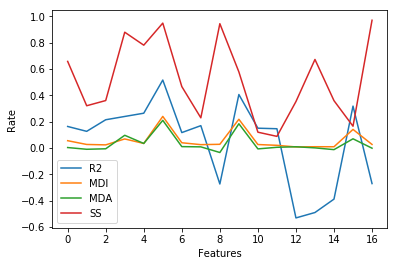

In [47]:
import matplotlib.pyplot as plt
fc = ['R2','MDI','MDA','SS']

for i in range(len(s)):
    plt.plot(columns, s[i], label = fc[i])
    
plt.legend(loc=0)
plt.xlabel('Features')
plt.ylabel('Rate')
plt.show()

## Small feature

In [82]:
import os
path = '/Users/zhenshihao/Desktop/2018_MCMProblemC_DATA/Useful-Data/1369_/'
os.chdir(path)

m = '1369_'


for i in Opioid_country:
    if i!=2017:
        array = list(0 for i in range(len(county)))
        string = 'eco1' + str(i)[-1] + '.csv'
        Df = pd.read_csv(string)
        Df.index = Df['GEO.id2']
        Df = Df.drop(columns=['GEO.id2'])
        if 51515 in Df.index:
            Df = Df.drop(index = [51159,51161,51685,51515])
        else:
            Df = Df.drop(index = [51159,51161,51685])

#             if i >= 2013:
#                 Df = Df.drop(columns = ['HC01_VC217'])
        Dict_county = {}
        for j in Opioid_country[i]:
            if j not in Dict_county:
                Dict_county[j] = Opioid_country[i][j][0]['Total_Reports']
            else:
                Dict_county[j] += Opioid_country[i][j][0]['Total_Reports']


        if 51515 in Dict_county:
            Dict_county.pop(51515)
        for i in Dict_county:
            array[county.index(i)] = Dict_county[i]

        array = np.array(array)

        Df['TotalDrugReports'] = array
        Df.to_csv('2'+string)
        print(m + '_2'+string+' end!'+str(len(Df.columns)))

warnings.filterwarnings("ignore")


scores = {}
mdi_scores = {}
mda_scores = {}
ss_scores = {}

wbk = xlsxwriter.Workbook(m + '_feature_correlation.xlsx')
sheet = wbk.add_worksheet('Data')

sheet.write(0, 0,'R2')
sheet.write(8, 0, 'MDI')
sheet.write(16, 0, 'MDA')
sheet.write(24, 0, 'SS')

sheet.write(33, 0, 'R2')
sheet.write(34, 0, 'MDI')
sheet.write(35, 0, 'MDA')
sheet.write(36, 0, 'SS')


for i in range(0, 74):
    sheet.write(0, i+1, i)

for i in range(0, 32, 8):
    for j in range(2010, 2017):
        sheet.write(i+j%2009, 0, j)




for k in range(0, 7):

    String = '2eco1' + str(k) + '.csv'
    Df = pd.read_csv(String)
    Datas = Df.values
    label = []
    sorts = []
    names = [i for i in range(0, len(Df.columns[1:-1]))]
    for i in Datas:
        label.append(i[-1])
        sorts.append(i[0])
    datas = np.delete(Datas, 0, axis = 1)
    datas = np.delete(datas, -1, axis = 1)

    scores_sum = [i for i in range(0, len(Df.columns[1:-1]))]
    mdi_scores_sum = [i for i in range(0, len(Df.columns[1:-1]))]
    mda_scores_sum = [i for i in range(0, len(Df.columns[1:-1]))]
    ss_scores_sum = [i for i in range(0, len(Df.columns[1:-1]))]

    for m in range(10):
        X = np.array(datas)

        Y = np.array(label)



        rf = RandomForestRegressor(n_estimators=20, max_depth=4)
        for i in range(X.shape[1]):
            score = cross_val_score(rf, X[:, i:i+1], Y, scoring="r2",cv=ShuffleSplit(len(X), 3, .3))
            if names[i] in scores:
                scores[names[i]] += round(np.mean(score), 4)
            else:
                scores[names[i]] = round(np.mean(score), 4)


            scores_sum[i] += round(np.mean(score), 4)
#             print('R2:',String, 'end.', len(scores) )
            if(m == 9):
                sheet.write(k+1, i+1, scores_sum[i]/10)
    #         sheet.write(k+1, i+1, round(np.mean(score), 4))

    
        rf = RandomForestRegressor(n_estimators=20, max_depth=4)
        for i in range(X.shape[1]):
            score = cross_val_score(rf, X[:, i:i+1], Y, scoring="r2",cv=ShuffleSplit(len(X), 3, .3))
            if names[i] in scores:
                scores[names[i]] += round(np.mean(score), 4)
            else:
                scores[names[i]] = round(np.mean(score), 4)
    #     print('R2:',String, 'end.', len(scores) )
            scores_sum[i] += round(np.mean(score), 4)
            if(m == 9):
                sheet.write(k+1, i+1, scores_sum[i]/10)


        rf = RandomForestRegressor()
        rf.fit(X, Y)
        mdi_score = list(map(lambda x: round(x, 4), rf.feature_importances_))
        for i in range(len(mdi_score)):
            if i in mdi_scores:
                mdi_scores[i] += mdi_score[i]
            else:
                mdi_scores[i] = mdi_score[i]

            mdi_scores_sum[i] += mdi_score[i]
            if(m == 9):
                sheet.write(9+k, i+1, mdi_scores_sum[i]/10)
        print('MDI', String, 'end.', len(mdi_scores))
    #         sheet.write(9+k, i+1, mdi_score[i])


        rf = RandomForestRegressor()
        mda_score = defaultdict(list)
        for train_idx, test_idx in ShuffleSplit(len(X), 100, .3):
            X_train, X_test = X[train_idx], X[test_idx]
            Y_train, Y_test = Y[train_idx], Y[test_idx]
            r = rf.fit(X_train, Y_train)
            acc = r2_score(Y_test, rf.predict(X_test))
            for i in range(X.shape[1]):
                X_t = X_test.copy()
                np.random.shuffle(X_t[:, i])
                shuff_acc = r2_score(Y_test, rf.predict(X_t))
                mda_score[names[i]].append((acc-shuff_acc)/acc)
        mda_score = [[round(np.mean(score), 4), feat] for feat,score in mda_score.items()]
        for i in range(0,len(mda_score)):
            if i in mda_scores:
                mda_scores[i] += mda_score[i][0]
            else:
                mda_scores[i] = mda_score[i][0]

            mda_scores_sum[i] += mda_score[i][0]
            if(m == 9):
                sheet.write(17+k, i+1, mda_scores_sum[i]/10)
        print('MDA', String, 'end.', len(mda_scores))
    #         sheet.write(17+k, i+1, mda_score[i][0])


        rlasso = RandomizedLasso(alpha=0.025)
        rlasso.fit(X, Y)
        ss_score = list(map(lambda x: round(x, 4), rlasso.scores_))
        for i in range(len(ss_score)):
            if i in ss_scores:
                ss_scores[i] += ss_score[i]
            else:
                ss_scores[i] = ss_score[i]

            ss_scores_sum[i] += ss_score[i]
            if(m == 9):
                sheet.write(25+k, i+1, ss_scores_sum[i]/10)
        print('SS', String, 'end', len(ss_scores))
        print()
    #         sheet.write(25+k, i+1, ss_score[i])




for i in scores:
    scores[i] = round(scores[i]/70,4)
    sheet.write(33, i+1, scores[i])

for i in mdi_scores:
    mdi_scores[i] = round(mdi_scores[i]/70, 4)
    sheet.write(34, i+1, mdi_scores[i])

for i in mda_scores:
    mda_scores[i] = round(mda_scores[i]/70, 4)
    sheet.write(35, i+1, mda_scores[i])


for i in ss_scores:
    ss_scores[i] = round(ss_scores[i]/70, 4)
    sheet.write(36, i+1, ss_scores[i])


print('R2: ',scores)
print()
print('MDI:',mdi_scores)
print()
print('MDA:',mda_scores)
print()
print('SS:',ss_scores)

wbk.close()

1369__2eco10.csv end!73
1369__2eco11.csv end!73
1369__2eco12.csv end!73
1369__2eco13.csv end!73
1369__2eco14.csv end!73
1369__2eco15.csv end!73
1369__2eco16.csv end!73
MDI 2eco10.csv end. 72
MDA 2eco10.csv end. 72
SS 2eco10.csv end 72

MDI 2eco10.csv end. 72
MDA 2eco10.csv end. 72
SS 2eco10.csv end 72

MDI 2eco10.csv end. 72
MDA 2eco10.csv end. 72
SS 2eco10.csv end 72

MDI 2eco10.csv end. 72
MDA 2eco10.csv end. 72
SS 2eco10.csv end 72

MDI 2eco10.csv end. 72
MDA 2eco10.csv end. 72
SS 2eco10.csv end 72

MDI 2eco10.csv end. 72
MDA 2eco10.csv end. 72
SS 2eco10.csv end 72

MDI 2eco10.csv end. 72
MDA 2eco10.csv end. 72
SS 2eco10.csv end 72

MDI 2eco10.csv end. 72
MDA 2eco10.csv end. 72
SS 2eco10.csv end 72

MDI 2eco10.csv end. 72
MDA 2eco10.csv end. 72
SS 2eco10.csv end 72

MDI 2eco10.csv end. 72
MDA 2eco10.csv end. 72
SS 2eco10.csv end 72

MDI 2eco11.csv end. 72
MDA 2eco11.csv end. 72
SS 2eco11.csv end 72

MDI 2eco11.csv end. 72
MDA 2eco11.csv end. 72
SS 2eco11.csv end 72

MDI 2eco11.csv e

In [261]:
import os
path = '/Users/zhenshihao/Desktop/2018_MCMProblemC_DATA/Useful-Data/1369_/'
os.chdir(path)

wbk = xlsxwriter.Workbook('All_Small_feature.xlsx')
sheet = wbk.add_worksheet('Data')

Al = ['GradientBoosting', 'RandomForest', 'Bagging', 'Decision', 'KNN']

sheet.write(0, 0, 'mean_squared_error')
sheet.write(8, 0, 'explained_variance_score')

for i in range(len(Al)):
    sheet.write(0, i+1, Al[i])
    
for i in range(2010,2017):
    sheet.write(i%2009, 0, i)
    sheet.write(i%2001, 0, i)
for k in range(0, 7):
    
    String = '2eco1' + str(k) + '.csv'
    Df = pd.read_csv(String)
    Datas = Df.values
    label = []
    sorts = []
    names = [i for i in range(0, len(Df.columns[1:-1]))]
    for i in Datas:
        label.append(i[-1])
        sorts.append(i[0])
    datas = np.delete(Datas, 0, axis = 1)
    datas = np.delete(datas, -1, axis = 1)
    
    print(len(datas))
    X = datas
    
    
    mean_squared = {}
    explained_variance = {}
    for i in range(10):
        for j in range(1,5):
            X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=1-0.1*j)
            
            
#             gbt = GradientBoostingRegressor(n_estimators=100)
#             gbt.fit(X_train, y_train)
            
#             if 'GradientBoosting' not in mean_squared:
#                 mean_squared['GradientBoosting'] = round(sm.mean_squared_error(y_test,gbt.predict(X_test)),2)
#                 explained_variance['GradientBoosting'] = round(sm.explained_variance_score(y_test,gbt.predict(X_test)),4)
#             else:
#                 mean_squared['GradientBoosting'] += round(sm.mean_squared_error(y_test,gbt.predict(X_test)),2)
#                 explained_variance['GradientBoosting'] += round(sm.explained_variance_score(y_test,gbt.predict(X_test)),4)
                
            
            
            rf = RandomForestRegressor(n_estimators=100)
            rf.fit(X_train, y_train)
            
            if 'RandomForest' not in mean_squared:
                mean_squared['RandomForest'] = round(sm.mean_squared_error(y_test,rf.predict(X_test)),2)
                explained_variance['RandomForest'] = round(sm.explained_variance_score(y_test,rf.predict(X_test)),4)
            else:
                mean_squared['RandomForest'] += round(sm.mean_squared_error(y_test,rf.predict(X_test)),2)
                explained_variance['RandomForest'] += round(sm.explained_variance_score(y_test,rf.predict(X_test)),4)
                
                
                
#             bagging_clf = BaggingRegressor(DecisionTreeRegressor(), 
#                                 n_estimators = 100, max_samples = 30,
#                                 bootstrap = True, oob_score = True)
#             bagging_clf.fit(X_train,y_train)
            
             
#             if 'Bagging' not in mean_squared:
#                 mean_squared['Bagging'] = round(sm.mean_squared_error(y_test,bagging_clf.predict(X_test)),2)
#                 explained_variance['Bagging'] = round(sm.explained_variance_score(y_test,bagging_clf.predict(X_test)),4)
#             else:
#                 mean_squared['Bagging'] += round(sm.mean_squared_error(y_test,bagging_clf.predict(X_test)),2)
#                 explained_variance['Bagging'] += round(sm.explained_variance_score(y_test,bagging_clf.predict(X_test)),4)

           

                
                
#             d_clf = DecisionTreeRegressor()
#             d_clf.fit(X_train, y_train)
            
#             if 'Decision' not in mean_squared:
#                 mean_squared['Decision'] = round(sm.mean_squared_error(y_test,d_clf.predict(X_test)),2)
#                 explained_variance['Decision'] = round(sm.explained_variance_score(y_test,d_clf.predict(X_test)),4)
#             else:
#                 mean_squared['Decision'] += round(sm.mean_squared_error(y_test,d_clf.predict(X_test)),2)
#                 explained_variance['Decision'] += round(sm.explained_variance_score(y_test,d_clf.predict(X_test)),4)

                
                
                
#             k_clf = KNeighborsRegressor(4)
#             k_clf.fit(X_train, y_train)
            
#             if 'KNN' not in mean_squared:
#                 mean_squared['KNN'] = round(sm.mean_squared_error(y_test,k_clf.predict(X_test)),2)
#                 explained_variance['KNN'] = round(sm.explained_variance_score(y_test,k_clf.predict(X_test)),4)
#             else:
#                 mean_squared['KNN'] += round(sm.mean_squared_error(y_test,k_clf.predict(X_test)),2)
#                 explained_variance['KNN'] += round(sm.explained_variance_score(y_test,k_clf.predict(X_test)),4)

                
#     print(k)
#     for i in mean_squared:
#         mean_squared[i] = round(mean_squared[i]/40,2)
#         explained_variance[i] = round(explained_variance[i]/40,4)
    
#     for i in range(len(Al)):
#         sheet.write(k+1, i+1, mean_squared[Al[i]])
#         sheet.write(k+9, i+1, explained_variance[Al[i]])
        
    
#     print('mean_squared_error:', mean_squared)
#     print()
#     print('explained_variance_score', explained_variance)
#     print()
    
wbk.close()

460
460
460
460
460
460
460


In [268]:
flags = []
for i in range(len(X)):
    if abs(rf.predict([X[i]])[0]-label[i])/rf.predict([X[i]])[0] < 0.1 and label[i] >600:
        print(i,'True_result:',label[i],'  Predict_result:', rf.predict([X[i]]), 'D:',abs(rf.predict([X[i]])[0]-label[i])/rf.predict([X[i]])[0])
        flags.append(i)
    

55 True_result: 1535.0   Predict_result: [1445.36] D: 0.062019150938174644
166 True_result: 1101.0   Predict_result: [1135.13] D: 0.030067040779470287
167 True_result: 871.0   Predict_result: [871.94] D: 0.0010780558295296174
169 True_result: 928.0   Predict_result: [909.46] D: 0.02038572339630106
197 True_result: 713.0   Predict_result: [694.66] D: 0.02640140500388684
213 True_result: 656.0   Predict_result: [708.35] D: 0.07390414343191928
229 True_result: 694.0   Predict_result: [769.96] D: 0.09865447555717184
243 True_result: 723.0   Predict_result: [756.45] D: 0.04421971048978788
247 True_result: 1026.0   Predict_result: [991.76] D: 0.03452448172945068


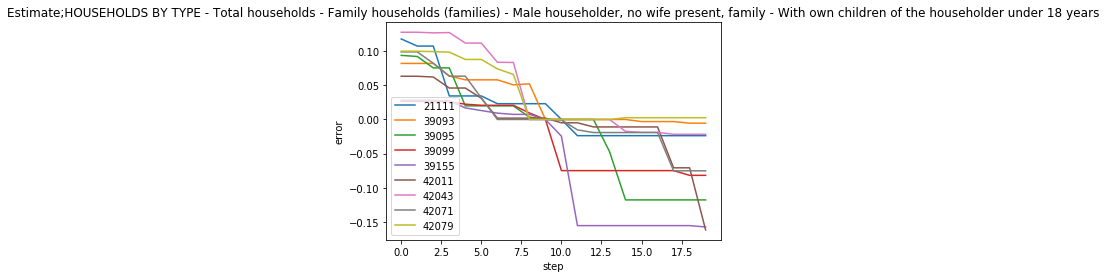

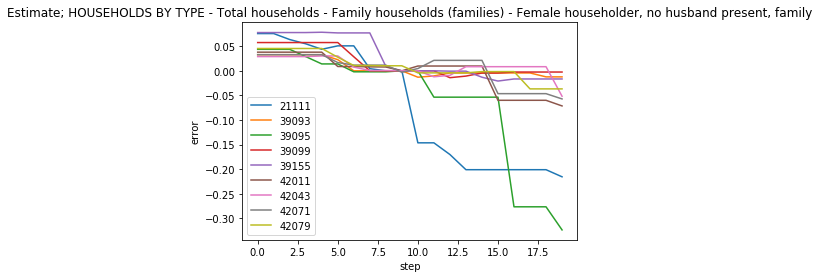

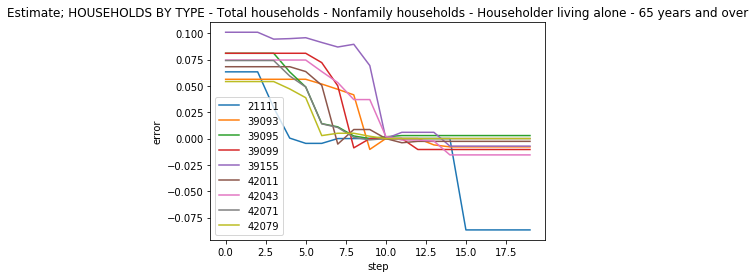

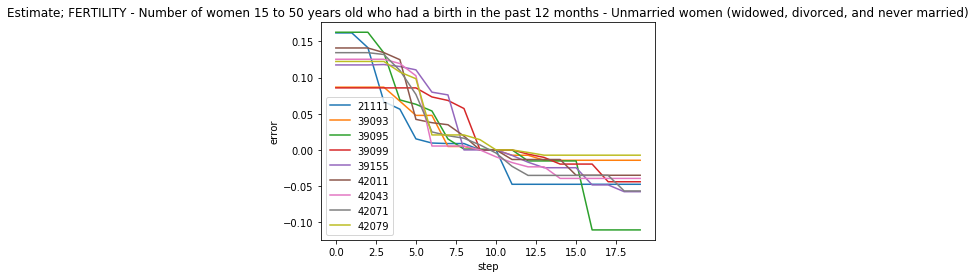

In [273]:
import copy
f = [5,6,10,15]
dict1 = {5:'Estimate;HOUSEHOLDS BY TYPE - Total households - Family households (families) - Male householder, no wife present, family - With own children of the householder under 18 years',
        6:'Estimate; HOUSEHOLDS BY TYPE - Total households - Family households (families) - Female householder, no husband present, family',
        10:'Estimate; HOUSEHOLDS BY TYPE - Total households - Nonfamily households - Householder living alone - 65 years and over',
        15:'Estimate; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months - Unmarried women (widowed, divorced, and never married)'}
for i in f:
    plt.figure()
    for flag in flags:
#         x = np.array([0 for i in range(len(X[flag]))])
        x = copy.deepcopy(X[flag])

        predict_result = []
        t = 2*x[i]
        for step in np.linspace(0,t,20):
            x[i] = step
            predict_result.append((rf.predict([X[flag]])[0]-rf.predict([x])[0])/(rf.predict([X[flag]])[0]))
        plt.plot([i for i in range(20)],predict_result,label = county[flag])
    plt.legend(loc = 3)
    plt.title(dict1[i])
    plt.xlabel('step')
    plt.ylabel('error')
    plt.savefig(str(i)+'.jpg')
    plt.show()


In [87]:
import os
path = '/Users/zhenshihao/Desktop/2018_MCMProblemC_DATA/Useful-Data/1369_/'
os.chdir(path)

wbk = xlsxwriter.Workbook('Small_Some_feature.xlsx')
sheet = wbk.add_worksheet('Data')

Al = ['GradientBoosting', 'RandomForest', 'Bagging', 'Decision', 'KNN']

sheet.write(0, 0, 'mean_squared_error')
sheet.write(8, 0, 'explained_variance_score')

for i in range(len(Al)):
    sheet.write(0, i+1, Al[i])
    
for i in range(2010,2017):
    sheet.write(i%2009, 0, i)
    sheet.write(i%2001, 0, i)
for k in range(0, 7):
    
    String = '2eco1' + str(k) + '.csv'
    Df = pd.read_csv(String)
    Datas = Df.values
    label = []
    sorts = []
    names = [i for i in range(0, len(Df.columns[1:-1]))]
    for i in Datas:
        label.append(i[-1])
        sorts.append(i[0])
    datas = np.delete(Datas, 0, axis = 1)
    datas = np.delete(datas, -1, axis = 1)
    
    print(len(datas))
    X = datas[:,[5, 6, 7, 9, 10, 15, 21, 53, 56, 65]]
    
    
    mean_squared = {}
    explained_variance = {}
    for i in range(10):
        for j in range(1,5):
            X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=1-0.1*j)
            
            
            gbt = GradientBoostingRegressor(n_estimators=100)
            gbt.fit(X_train, y_train)
            
            if 'GradientBoosting' not in mean_squared:
                mean_squared['GradientBoosting'] = round(sm.mean_squared_error(y_test,gbt.predict(X_test)),2)
                explained_variance['GradientBoosting'] = round(sm.explained_variance_score(y_test,gbt.predict(X_test)),4)
            else:
                mean_squared['GradientBoosting'] += round(sm.mean_squared_error(y_test,gbt.predict(X_test)),2)
                explained_variance['GradientBoosting'] += round(sm.explained_variance_score(y_test,gbt.predict(X_test)),4)
                
            
            
            rf = RandomForestRegressor(n_estimators=100)
            rf.fit(X_train, y_train)
            
            if 'RandomForest' not in mean_squared:
                mean_squared['RandomForest'] = round(sm.mean_squared_error(y_test,rf.predict(X_test)),2)
                explained_variance['RandomForest'] = round(sm.explained_variance_score(y_test,rf.predict(X_test)),4)
            else:
                mean_squared['RandomForest'] += round(sm.mean_squared_error(y_test,rf.predict(X_test)),2)
                explained_variance['RandomForest'] += round(sm.explained_variance_score(y_test,rf.predict(X_test)),4)
                
                
                
            bagging_clf = BaggingRegressor(DecisionTreeRegressor(), 
                                n_estimators = 100, max_samples = 30,
                                bootstrap = True, oob_score = True)
            bagging_clf.fit(X_train,y_train)
            
             
            if 'Bagging' not in mean_squared:
                mean_squared['Bagging'] = round(sm.mean_squared_error(y_test,bagging_clf.predict(X_test)),2)
                explained_variance['Bagging'] = round(sm.explained_variance_score(y_test,bagging_clf.predict(X_test)),4)
            else:
                mean_squared['Bagging'] += round(sm.mean_squared_error(y_test,bagging_clf.predict(X_test)),2)
                explained_variance['Bagging'] += round(sm.explained_variance_score(y_test,bagging_clf.predict(X_test)),4)

           

                
                
            d_clf = DecisionTreeRegressor()
            d_clf.fit(X_train, y_train)
            
            if 'Decision' not in mean_squared:
                mean_squared['Decision'] = round(sm.mean_squared_error(y_test,d_clf.predict(X_test)),2)
                explained_variance['Decision'] = round(sm.explained_variance_score(y_test,d_clf.predict(X_test)),4)
            else:
                mean_squared['Decision'] += round(sm.mean_squared_error(y_test,d_clf.predict(X_test)),2)
                explained_variance['Decision'] += round(sm.explained_variance_score(y_test,d_clf.predict(X_test)),4)

                
                
                
            k_clf = KNeighborsRegressor(4)
            k_clf.fit(X_train, y_train)
            
            if 'KNN' not in mean_squared:
                mean_squared['KNN'] = round(sm.mean_squared_error(y_test,k_clf.predict(X_test)),2)
                explained_variance['KNN'] = round(sm.explained_variance_score(y_test,k_clf.predict(X_test)),4)
            else:
                mean_squared['KNN'] += round(sm.mean_squared_error(y_test,k_clf.predict(X_test)),2)
                explained_variance['KNN'] += round(sm.explained_variance_score(y_test,k_clf.predict(X_test)),4)

                
    print(k)
    for i in mean_squared:
        mean_squared[i] = round(mean_squared[i]/40,2)
        explained_variance[i] = round(explained_variance[i]/40,4)
    
    for i in range(len(Al)):
        sheet.write(k+1, i+1, mean_squared[Al[i]])
        sheet.write(k+9, i+1, explained_variance[Al[i]])
        
    
    print('mean_squared_error:', mean_squared)
    print()
    print('explained_variance_score', explained_variance)
    print()
    
wbk.close()

460
0
mean_squared_error: {'GradientBoosting': 115480.63, 'RandomForest': 99796.36, 'Bagging': 97813.43, 'Decision': 132802.9, 'KNN': 97751.73}

explained_variance_score {'GradientBoosting': 0.1536, 'RandomForest': 0.2971, 'Bagging': 0.3477, 'Decision': 0.0031, 'KNN': 0.3504}

460
1
mean_squared_error: {'GradientBoosting': 97724.58, 'RandomForest': 87362.34, 'Bagging': 94989.29, 'Decision': 122091.51, 'KNN': 94875.13}

explained_variance_score {'GradientBoosting': 0.3048, 'RandomForest': 0.3916, 'Bagging': 0.3739, 'Decision': 0.0755, 'KNN': 0.3509}

460
2
mean_squared_error: {'GradientBoosting': 93239.19, 'RandomForest': 91868.49, 'Bagging': 111919.8, 'Decision': 121371.82, 'KNN': 108630.2}

explained_variance_score {'GradientBoosting': 0.4753, 'RandomForest': 0.5042, 'Bagging': 0.4097, 'Decision': 0.2549, 'KNN': 0.4201}

460
3
mean_squared_error: {'GradientBoosting': 97989.6, 'RandomForest': 95871.0, 'Bagging': 121502.07, 'Decision': 130145.48, 'KNN': 126235.06}

explained_variance_sc

In [89]:
sort = [[15,67,57,63,9,50,46,48,21,16],[15,5,6,54,55,53,16,1,63,57],[5,15,63,6,34,9,26,47,70,10],
        [10,21,6,15,66,50,69,67,57,7],[15,54,70,9,57,10,56,6,61,50],[15,7,70,54,4,9,65,6,57,47],
        [15,46,47,35,69,54,55,66,31,3]]

In [90]:
import os
path = '/Users/zhenshihao/Desktop/2018_MCMProblemC_DATA/Useful-Data/1369_/'
os.chdir(path)

wbk = xlsxwriter.Workbook('Special_Some_feature.xlsx')
sheet = wbk.add_worksheet('Data')

Al = ['GradientBoosting', 'RandomForest', 'Bagging', 'Decision', 'KNN']

sheet.write(0, 0, 'mean_squared_error')
sheet.write(8, 0, 'explained_variance_score')

for i in range(len(Al)):
    sheet.write(0, i+1, Al[i])
    
for i in range(2010,2017):
    sheet.write(i%2009, 0, i)
    sheet.write(i%2001, 0, i)
for k in range(0, 7):
    
    String = '2eco1' + str(k) + '.csv'
    Df = pd.read_csv(String)
    Datas = Df.values
    label = []
    sorts = []
    names = [i for i in range(0, len(Df.columns[1:-1]))]
    for i in Datas:
        label.append(i[-1])
        sorts.append(i[0])
    datas = np.delete(Datas, 0, axis = 1)
    datas = np.delete(datas, -1, axis = 1)
    
    print(len(datas))
    X = datas[:,sort[k]]
    
    
    mean_squared = {}
    explained_variance = {}
    for i in range(10):
        for j in range(1,5):
            X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=1-0.1*j)
            
            
            gbt = GradientBoostingRegressor(n_estimators=100)
            gbt.fit(X_train, y_train)
            
            if 'GradientBoosting' not in mean_squared:
                mean_squared['GradientBoosting'] = round(sm.mean_squared_error(y_test,gbt.predict(X_test)),2)
                explained_variance['GradientBoosting'] = round(sm.explained_variance_score(y_test,gbt.predict(X_test)),4)
            else:
                mean_squared['GradientBoosting'] += round(sm.mean_squared_error(y_test,gbt.predict(X_test)),2)
                explained_variance['GradientBoosting'] += round(sm.explained_variance_score(y_test,gbt.predict(X_test)),4)
                
            
            
            rf = RandomForestRegressor(n_estimators=100)
            rf.fit(X_train, y_train)
            
            if 'RandomForest' not in mean_squared:
                mean_squared['RandomForest'] = round(sm.mean_squared_error(y_test,rf.predict(X_test)),2)
                explained_variance['RandomForest'] = round(sm.explained_variance_score(y_test,rf.predict(X_test)),4)
            else:
                mean_squared['RandomForest'] += round(sm.mean_squared_error(y_test,rf.predict(X_test)),2)
                explained_variance['RandomForest'] += round(sm.explained_variance_score(y_test,rf.predict(X_test)),4)
                
                
                
            bagging_clf = BaggingRegressor(DecisionTreeRegressor(), 
                                n_estimators = 100, max_samples = 30,
                                bootstrap = True, oob_score = True)
            bagging_clf.fit(X_train,y_train)
            
             
            if 'Bagging' not in mean_squared:
                mean_squared['Bagging'] = round(sm.mean_squared_error(y_test,bagging_clf.predict(X_test)),2)
                explained_variance['Bagging'] = round(sm.explained_variance_score(y_test,bagging_clf.predict(X_test)),4)
            else:
                mean_squared['Bagging'] += round(sm.mean_squared_error(y_test,bagging_clf.predict(X_test)),2)
                explained_variance['Bagging'] += round(sm.explained_variance_score(y_test,bagging_clf.predict(X_test)),4)

           

                
                
            d_clf = DecisionTreeRegressor()
            d_clf.fit(X_train, y_train)
            
            if 'Decision' not in mean_squared:
                mean_squared['Decision'] = round(sm.mean_squared_error(y_test,d_clf.predict(X_test)),2)
                explained_variance['Decision'] = round(sm.explained_variance_score(y_test,d_clf.predict(X_test)),4)
            else:
                mean_squared['Decision'] += round(sm.mean_squared_error(y_test,d_clf.predict(X_test)),2)
                explained_variance['Decision'] += round(sm.explained_variance_score(y_test,d_clf.predict(X_test)),4)

                
                
                
            k_clf = KNeighborsRegressor(4)
            k_clf.fit(X_train, y_train)
            
            if 'KNN' not in mean_squared:
                mean_squared['KNN'] = round(sm.mean_squared_error(y_test,k_clf.predict(X_test)),2)
                explained_variance['KNN'] = round(sm.explained_variance_score(y_test,k_clf.predict(X_test)),4)
            else:
                mean_squared['KNN'] += round(sm.mean_squared_error(y_test,k_clf.predict(X_test)),2)
                explained_variance['KNN'] += round(sm.explained_variance_score(y_test,k_clf.predict(X_test)),4)

                
    print(k)
    for i in mean_squared:
        mean_squared[i] = round(mean_squared[i]/40,2)
        explained_variance[i] = round(explained_variance[i]/40,4)
    
    for i in range(len(Al)):
        sheet.write(k+1, i+1, mean_squared[Al[i]])
        sheet.write(k+9, i+1, explained_variance[Al[i]])
        
    
    print('mean_squared_error:', mean_squared)
    print()
    print('explained_variance_score', explained_variance)
    print()
    
wbk.close()



460
0
mean_squared_error: {'GradientBoosting': 127792.91, 'RandomForest': 118193.1, 'Bagging': 121171.41, 'Decision': 151735.94, 'KNN': 118191.25}

explained_variance_score {'GradientBoosting': 0.1963, 'RandomForest': 0.286, 'Bagging': 0.2898, 'Decision': -0.0166, 'KNN': 0.2979}

460
1
mean_squared_error: {'GradientBoosting': 103072.17, 'RandomForest': 99259.03, 'Bagging': 108526.94, 'Decision': 123880.9, 'KNN': 115452.43}

explained_variance_score {'GradientBoosting': 0.2819, 'RandomForest': 0.3423, 'Bagging': 0.3376, 'Decision': 0.0819, 'KNN': 0.2726}

460
2
mean_squared_error: {'GradientBoosting': 103981.21, 'RandomForest': 103502.61, 'Bagging': 127650.16, 'Decision': 122907.64, 'KNN': 118058.89}

explained_variance_score {'GradientBoosting': 0.4772, 'RandomForest': 0.4862, 'Bagging': 0.3651, 'Decision': 0.3602, 'KNN': 0.4204}

460
3
mean_squared_error: {'GradientBoosting': 104132.89, 'RandomForest': 100373.28, 'Bagging': 123678.24, 'Decision': 152508.66, 'KNN': 125914.43}

explaine

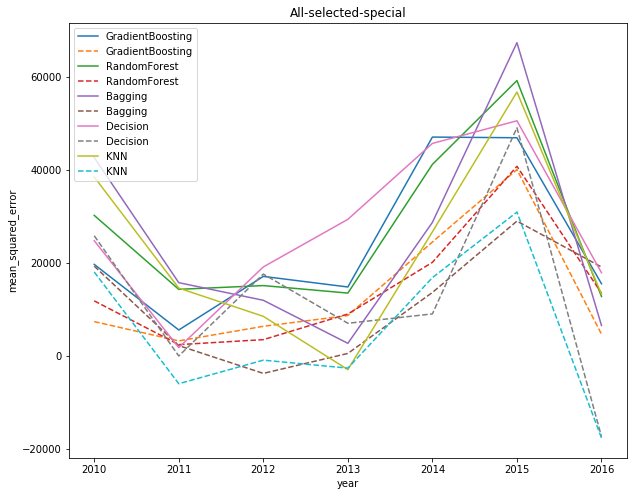

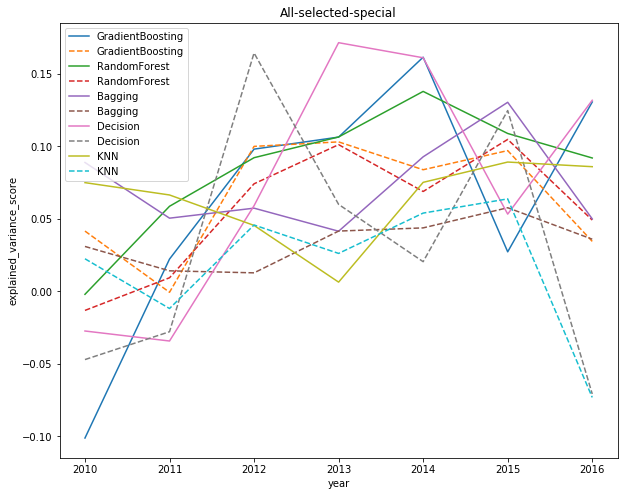

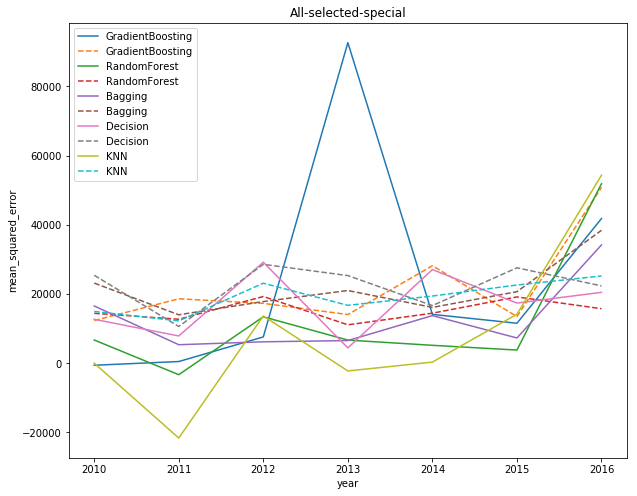

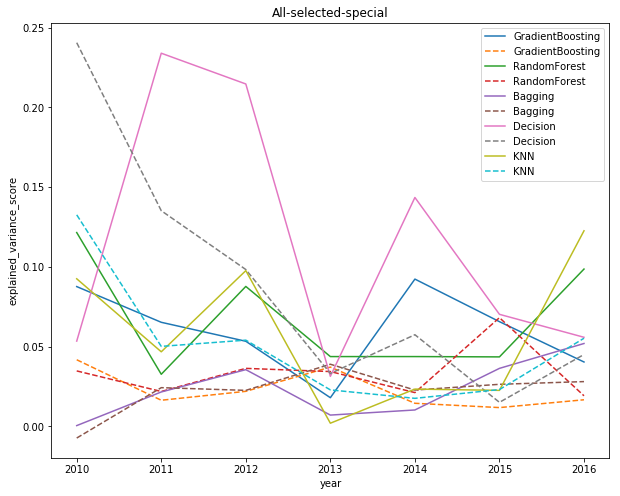

In [130]:
import matplotlib.pyplot as plt

path = '/Users/zhenshihao/Desktop/2018_MCMProblemC_DATA/Useful-Data/1369_/'
os.chdir(path)
plt.figure(figsize = (10,8))

Df1 = pd.read_excel('All_Small_feature.xlsx')
Df2 = pd.read_excel('Small_Some_feature.xlsx')
Df3 = pd.read_excel('Special_Some_feature.xlsx')
Df1.drop(columns=['mean_squared_error'])
Df2.drop(columns=['mean_squared_error'])
Df3.drop(columns=['mean_squared_error'])
year = [i for i in range(2010,2017)]
for i in Al:
    d1 = Df1[i][:7]
    d2 = Df2[i][:7]
    d3 = Df3[i][:7]
    plt.plot(year, d1-d2, label = i)
    plt.plot(year, d1-d3, label = i, linestyle = '--')
    
plt.legend(loc = 2)
plt.title('All-selected-special')
plt.xlabel('year')
plt.ylabel('mean_squared_error')
plt.savefig('M_Small_All_selected_special.jpg')
plt.show()

plt.figure(figsize = (10,8))
for i in Al:
    d1 = Df1[i][8:15]
    d2 = Df2[i][8:15]
    d3 = Df3[i][8:15]
    plt.plot(year, d2-d1, label = i)
    plt.plot(year, d3-d1, label = i, linestyle = '--')
    
plt.legend(loc = 2)
plt.title('All-selected-special')
plt.xlabel('year')
plt.ylabel('explained_variance_score')
plt.savefig('E_Small_All_selected_special.jpg')
plt.show()




# year = [i for i in range(2010,2017)]
# for i in Al:
#     d1 = Df1[i][:7]
    
    
#     plt.plot(year, d1-d3+10000, label = i)
    
# plt.legend()
# plt.title('All-special')
# plt.xlabel('year')
# plt.ylabel('mean_squared_error')
# plt.savefig('All_special.jpg')
# plt.show()


path = '/Users/zhenshihao/Desktop/2018_MCMProblemC_DATA/Useful-Data'
os.chdir(path)
plt.figure(figsize = (10,8))
Df1 = pd.read_excel('All_feature.xlsx')
Df2 = pd.read_excel('Some_feature.xlsx')
Df1.drop(columns=['mean_squared_error'])
Df2.drop(columns=['mean_squared_error'])
Df3 = pd.read_excel('Special_feature.xlsx')
Df3.drop(columns=['mean_squared_error'])
year = [i for i in range(2010,2017)]
for i in Al:
    d1 = Df1[i][:7]
    d2 = Df2[i][:7]
    d3 = Df3[i][:7]
    plt.plot(year, d1-d2, label = i)
    plt.plot(year, d1-d3+10000, label = i, linestyle = '--')
    
plt.legend(loc = 2)
plt.title('All-selected-special')
plt.xlabel('year')
plt.ylabel('mean_squared_error')
plt.savefig('M_All_selected_special.jpg')
plt.show()

plt.figure(figsize = (10,8))
for i in Al:
    d1 = Df1[i][8:15]
    d2 = Df2[i][8:15]
    d3 = Df3[i][8:15]
    plt.plot(year, d2-d1, label = i)
    plt.plot(year, d3-d1, label = i, linestyle = '--')
    
plt.legend(loc = 1)
plt.title('All-selected-special')
plt.xlabel('year')
plt.ylabel('explained_variance_score')
plt.savefig('E_All_selected_special.jpg')
plt.show()



'/Users/zhenshihao/Desktop/2018_MCMProblemC_DATA/Useful-Data/1369_'

,GradientBoosting,RandomForest,Bagging,Decision,KNN
0,115480.6300,99796.3600,97813.4300,132802.9000,97751.7300
1,97724.5800,87362.3400,94989.2900,122091.5100,94875.1300
2,93239.1900,91868.4900,111919.8000,121371.8200,108630.2000
3,97989.6000,95871.0000,121502.0700,130145.4800,126235.0600
4,87781.1100,85183.9600,118887.3100,115469.5700,117932.2600
5,165333.2800,144105.4600,162781.2600,208708.5200,167375.5700
6,267362.1100,241764.0100,270562.6500,287486.6200,261806.8600
7,NaN,NaN,NaN,NaN,NaN
8,0.1536,0.2971,0.3477,0.0031,0.3504
9,0.3048,0.3916,0.3739,0.0755,0.3509


['GradientBoosting', 'RandomForest', 'Bagging', 'Decision', 'KNN']

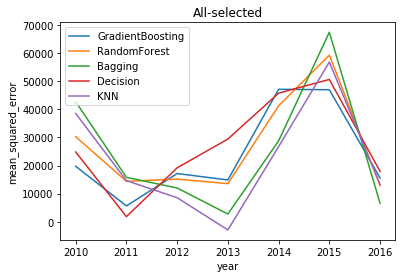